In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import src.mc_functions as mc

In [5]:
df = mc.create_dataframe()

In [9]:
df['on_water'] = [1 if x > 0 else 0 for x in df['TidelandShoreland']]

In [20]:
df['duplex'] = [1 if x == 3 else 0 for x in df['PresentUse']]

### Creating a correlation matrix

In [61]:
df.shape

(43867, 17)

### Dropping rows with zeros in the 'SalePrice' column

In [ ]:
df = 

In [11]:
df.corr()

,SalePrice,SqFt1stFloor,SqFt2ndFloor,SqFtTotLiving,SqFtOpenPorch,SqFtEnclosedPorch,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,TidelandShoreland,PresentUse,has_porch,on_water
SalePrice,1.000000,0.118724,0.157990,0.195816,0.107674,0.015146,-0.019141,NaN,-0.007842,-0.008572,0.085883,0.032020,0.080662,0.086136
SqFt1stFloor,0.118724,1.000000,0.165876,0.691599,0.315807,0.015350,-0.068134,NaN,0.023410,-0.071787,0.090686,-0.118489,0.163891,0.089556
SqFt2ndFloor,0.157990,0.165876,1.000000,0.655549,0.344108,-0.032103,-0.092635,NaN,0.014228,-0.041647,0.025951,0.109825,0.362511,0.026436
SqFtTotLiving,0.195816,0.691599,0.655549,1.000000,0.416241,-0.002453,-0.077343,NaN,0.018413,-0.059115,0.114222,-0.005238,0.304576,0.114150
SqFtOpenPorch,0.107674,0.315807,0.344108,0.416241,1.000000,-0.007702,-0.034162,NaN,0.017681,-0.020643,0.065253,0.022659,0.499036,0.065928
SqFtEnclosedPorch,0.015146,0.015350,-0.032103,-0.002453,-0.007702,1.000000,0.026402,NaN,-0.005945,0.006116,0.033692,-0.004613,0.150098,0.034589
TrafficNoise,-0.019141,-0.068134,-0.092635,-0.077343,-0.034162,0.026402,1.000000,NaN,-0.007387,0.046624,0.003418,0.000750,-0.038625,0.002725
AirportNoise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PowerLines,-0.007842,0.023410,0.014228,0.018413,0.017681,-0.005945,-0.007387,NaN,1.000000,0.007345,-0.011050,-0.013475,0.001927,-0.011122
OtherNuisances,-0.008572,-0.071787,-0.041647,-0.059115,-0.020643,0.006116,0.046624,NaN,0.007345,1.000000,0.015014,0.016235,-0.030293,0.016079


#### The three claims we are addressing with this first model are 'Having a porch increases home sale price', 'The house filling a higher proportion of the overall lot decreases home sale price', and 'The presence of a nuisance (power line, traffic noise, airport noise) decreases home sale price. From the correlation matrix we can see that the rows 'has porch' would address the first claim, sq ft 1st floor addresses the second claim, and 'traffic noise, power lines, and other nuisances adress the third. The correlation between these features and the sale price isn't significant but large enough for our first model.

### Visualizing correlation with heatmap

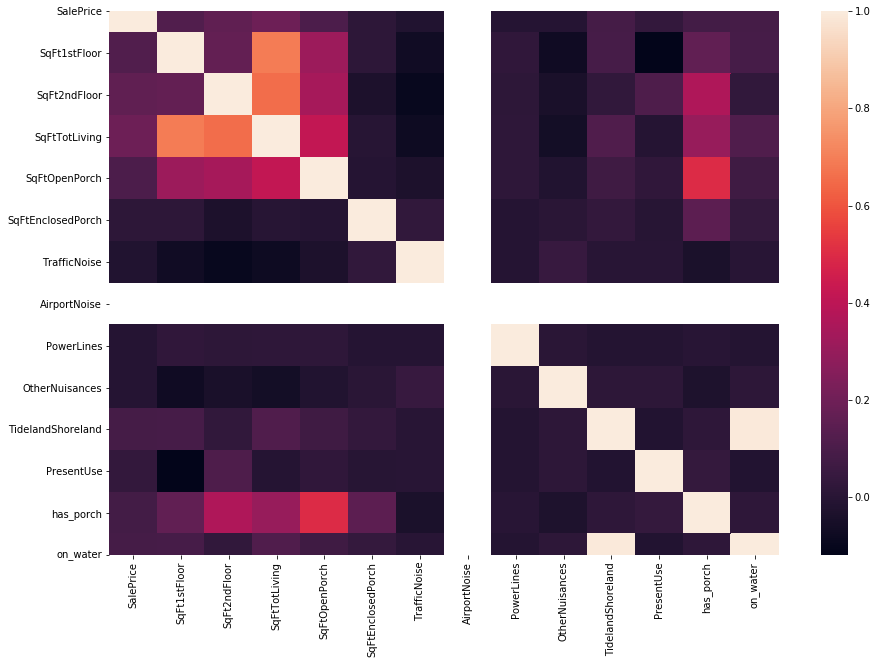

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr())

In [21]:
df['NbrBldgSites'].value_counts()

0     43610
1       180
2        48
3        11
6         5
5         5
4         4
61        1
11        1
10        1
9         1
Name: NbrBldgSites, dtype: int64

In [23]:
correlation_df = df[['SalePrice', 'has_porch', 'on_water', 'duplex']]

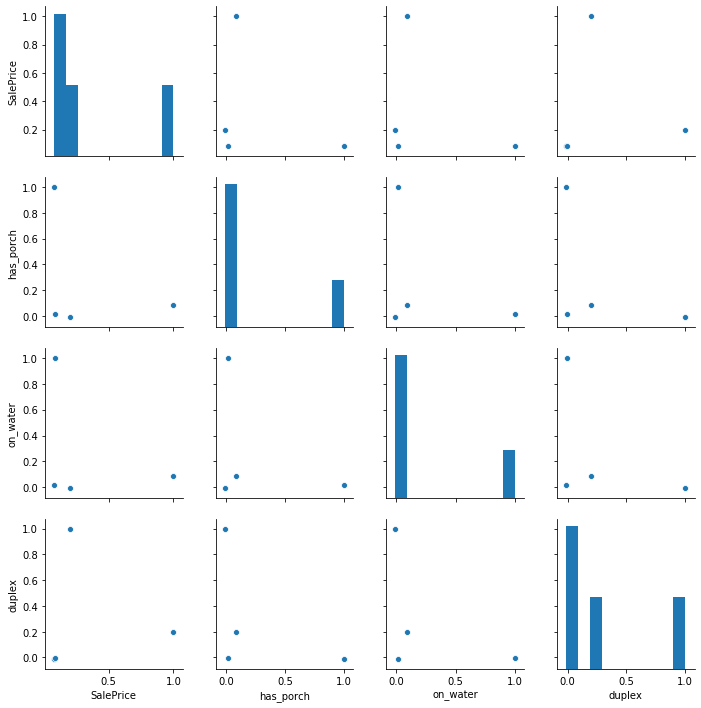

In [24]:
sns.pairplot(correlation_df.corr())

In [35]:
fsm_df = df[['duplex', 'SalePrice']]

In [36]:
formula = 'SalePrice ~ duplex'

In [44]:
import statsmodels.api as sm

In [46]:
correlation_df = df[['has_porch', 'on_water', 'duplex']]

In [47]:
target_var = df['SalePrice']

In [48]:
model = sm.OLS(target_var, correlation_df).fit()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.193
Model:                            OLS   Adj. R-squared (uncentered):              0.193
Method:                 Least Squares   F-statistic:                              3498.
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:07:30   Log-Likelihood:                     -6.7552e+05
No. Observations:               43867   AIC:                                  1.351e+06
Df Residuals:                   43864   BIC:                                  1.351e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
has_porch   6.389e+05   7753.016     82.405      0.000    6.24e+05    6.54e+05
on_water    1.121e+06   5.27e+04     21.270      0.000    1.02e+06    1.22e+06
duplex      2.206e+06   4.72e+04     46.765      0.000    2.11e+06     2.3e+06
==============================================================================
Omnibus:                    77560.268   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        197112640.456
Skew:                          12.396   Prob(JB):                         0.00
Kurtosis:                     330.456   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Identifying Categorical Variables

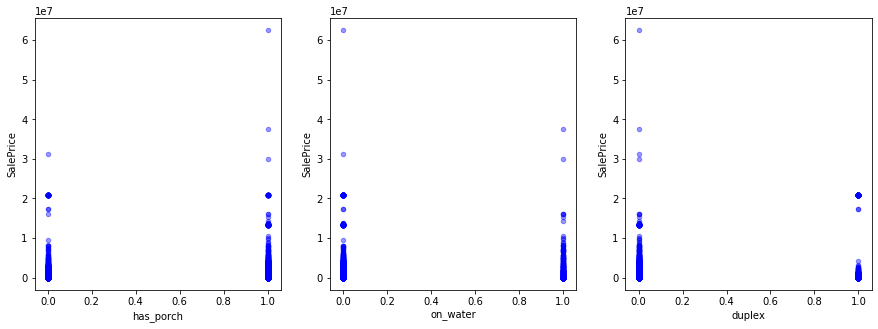

In [60]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for xcol, ax in zip(['has_porch', 'on_water', 'duplex'], ax):
    df.plot(kind='scatter', x=xcol, y='SalePrice', ax=ax, alpha=0.4, color='b')

#### The scatter plot above shows that these three variables are categorical

### Checking Linearity

In [50]:
rsquared = model.rsquared
params = model.params
print(f' Rsquared of FSM: {rsquared}')
print(f' Beta values of FSL: {params}')

 Rsquared of FSM: 0.193065924164047
 Beta values of FSL: has_porch    6.388904e+05
on_water     1.120809e+06
duplex       2.205917e+06
dtype: float64


In [51]:
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 4.039231150166095
Rainbow p-value: 0.0


### Checking Normality

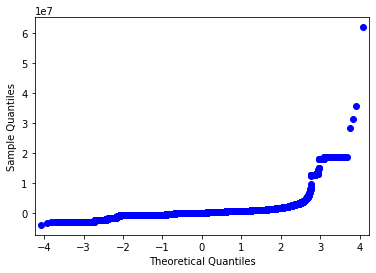

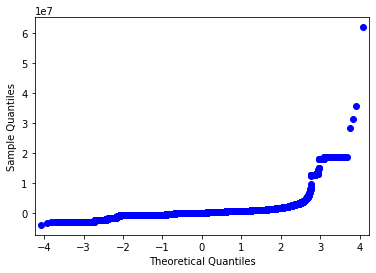

In [55]:
model_resids = model.resid
sm.qqplot(model_resids)

### Checking Homoscadasticity

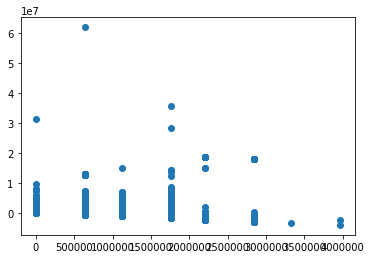

In [57]:
y_hat = model.predict()
fig, ax = plt.subplots()
ax.scatter(y_hat, model_resids)